<a href="https://colab.research.google.com/github/rayjinghaolei/UWARG-CV/blob/main/YoloV2_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.27 MiB | 24.48 MiB/s, done.
Resolving deltas: 100% (9995/9995), done.


In [4]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [5]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [6]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [7]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2021-02-03 15:14:56--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M   724KB/s    in 7m 47s  

2021-02-03 15:22:43 (426 KB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [8]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       vcpkg.json
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj		       yolov2.weights
CMakeLists.txt	image_yolov4.sh		README.md
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104

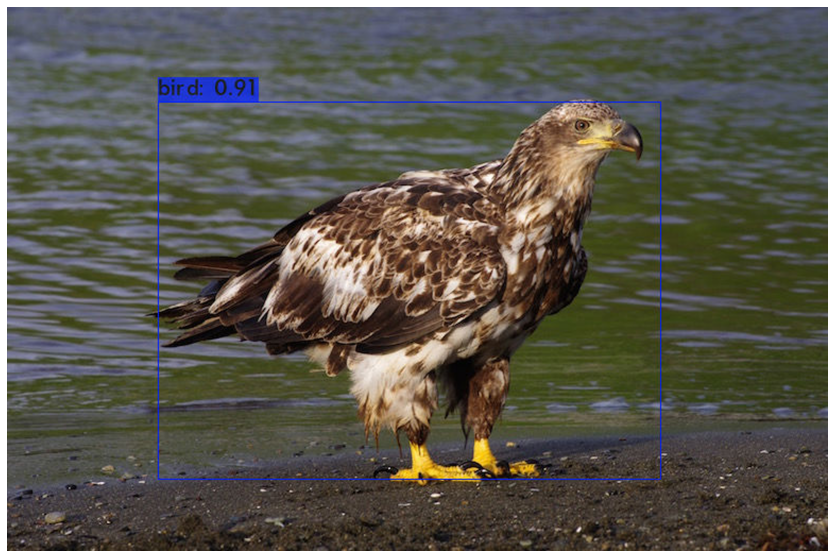

In [9]:
!ls
!./darknet detect cfg/yolov2.cfg yolov2.weights data/eagle.jpg
imShow('predictions.jpg')

In [10]:
!ls
!pwd

3rdparty	darknet			include		       README.md
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  results
build		darknet_images.py	LICENSE		       scripts
build.ps1	darknet.py		Makefile	       src
build.sh	darknet_video.py	net_cam_v3.sh	       vcpkg.json
cfg		data			net_cam_v4.sh	       video_yolov3.sh
cmake		image_yolov3.sh		obj		       video_yolov4.sh
CMakeLists.txt	image_yolov4.sh		predictions.jpg        yolov2.weights
/content/darknet


In [11]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [12]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'190 group activity 2.gdoc'
 222lab
'240 lab'
'2A course resources.gdoc'
'2A Jinghao (Ray) Lei - Resume.pdf'
 79159200299-1141454953-ticket.gdoc
 79159200299-1141454953-ticket.pdf
'after start.gdoc'
'AK textbook.pdf'
'Android app development'
'AWS bash file.gdoc'
 axGmap_Remedy_phone.html
'Call for Code IBM.gdoc'
'Career development'
'cheat sheet.gdoc'
'cheat sheet.pdf'
'Colab Notebooks'
'Computer Science Club 2018-2019'
 connections
'Cover Letter ROS related.gdoc'
 CS229
'cs231 screen shots'
'CS club Promotion Video.mp4'
'cutc notes review.gdoc'
 data3_group17.xlsx
'Discrete Math textbook.pdf'
 DSC_0145.jpg
 ECE124
'ECE 140 - Fundamentals of Electric Circuits (6th Ed).pdf'
'ECE 150'
'ECE 192 - Engineering Economic Analysis Fourth Canadian Edition-Oxford University Press (2016).pdf'
'ECE 222 - Computer Organization and Embedded Systems 6th Edition.pdf'
'ECE S8 Academic Survey.gform'
'ECE stream 8 Section 3 Academic Survey Feedback.gdoc'
'elementary linear algebra a matrix approach-2nd-

In [13]:
!ls /mydrive/yolov2_transfer_learning

generate_train.py  obj.names  references.gdoc
obj.data	   obj.zip    yolov2_custom.cfg


In [14]:
%cd darknet/

/content/darknet


In [15]:
!ls

3rdparty	darknet			include		       README.md
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  results
build		darknet_images.py	LICENSE		       scripts
build.ps1	darknet.py		Makefile	       src
build.sh	darknet_video.py	net_cam_v3.sh	       vcpkg.json
cfg		data			net_cam_v4.sh	       video_yolov3.sh
cmake		image_yolov3.sh		obj		       video_yolov4.sh
CMakeLists.txt	image_yolov4.sh		predictions.jpg        yolov2.weights


In [16]:
!cp /mydrive/yolov2_transfer_learning/obj.zip ../

In [17]:
%cd data/
!mkdir images
!ls
%cd ..

/content/darknet/data
9k.tree     eagle.jpg	 imagenet.labels.list	   openimages.names
coco9k.map  giraffe.jpg  imagenet.shortnames.list  person.jpg
coco.names  goal.txt	 images			   scream.jpg
dog.jpg     horses.jpg	 labels			   voc.names
/content/darknet


In [18]:
!unzip ../obj.zip -d data/images

Archive:  ../obj.zip
  inflating: data/images/1.jpg       
  inflating: data/images/__MACOSX/._1.jpg  
  inflating: data/images/2.jpg       
  inflating: data/images/__MACOSX/._2.jpg  
  inflating: data/images/3.jpg       
  inflating: data/images/__MACOSX/._3.jpg  
  inflating: data/images/4.jpg       
  inflating: data/images/__MACOSX/._4.jpg  
  inflating: data/images/5.jpg       
  inflating: data/images/__MACOSX/._5.jpg  
  inflating: data/images/6.jpg       
  inflating: data/images/__MACOSX/._6.jpg  
  inflating: data/images/7.jpg       
  inflating: data/images/__MACOSX/._7.jpg  
  inflating: data/images/8.jpg       
  inflating: data/images/__MACOSX/._8.jpg  
  inflating: data/images/9.jpg       
  inflating: data/images/__MACOSX/._9.jpg  
  inflating: data/images/10.jpg      
  inflating: data/images/__MACOSX/._10.jpg  
  inflating: data/images/11.jpg      
  inflating: data/images/__MACOSX/._11.jpg  
  inflating: data/images/12.jpg      
  inflating: data/images/__MACOSX/._1

In [19]:
!cp /mydrive/yolov2_transfer_learning/yolov2_custom.cfg ./cfg
!cp /mydrive/yolov2_transfer_learning/obj.data ./data
!cp /mydrive/yolov2_transfer_learning/obj.names ./data
!cp /mydrive/yolov2_transfer_learning/generate_train.py ./

In [20]:
!python generate_train.py
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 images			   openimages.names  voc.names
dog.jpg     horses.jpg	 labels			   person.jpg


In [21]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2021-02-03 15:42:29--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M  3.33MB/s    in 58s     

2021-02-03 15:43:27 (1.31 MB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



In [24]:
!./darknet detector train data/obj.data cfg/yolov2_custom.cfg darknet19_448.conv.23 -dont_show

Streaming output truncated to the last 5000 lines.
Region Avg IOU: 0.856108, Class: 1.000000, Obj: 0.874324, No Obj: 0.008386, Avg Recall: 1.000000,  count: 13

 1566: 0.040830, 0.056673 avg loss, 0.001000 rate, 1.872474 seconds, 100224 images, 0.436978 hours left
Loaded: 0.000068 seconds
Region Avg IOU: 0.864237, Class: 1.000000, Obj: 0.896565, No Obj: 0.005988, Avg Recall: 1.000000,  count: 8
Region Avg IOU: 0.856439, Class: 1.000000, Obj: 0.815472, No Obj: 0.008782, Avg Recall: 1.000000,  count: 18
Region Avg IOU: 0.826553, Class: 1.000000, Obj: 0.880702, No Obj: 0.006853, Avg Recall: 1.000000,  count: 11
Region Avg IOU: 0.837213, Class: 1.000000, Obj: 0.760478, No Obj: 0.006507, Avg Recall: 1.000000,  count: 11
Region Avg IOU: 0.858963, Class: 1.000000, Obj: 0.832381, No Obj: 0.007336, Avg Recall: 1.000000,  count: 11
Region Avg IOU: 0.856764, Class: 1.000000, Obj: 0.878298, No Obj: 0.008017, Avg Recall: 1.000000,  count: 14
Region Avg IOU: 0.838851, Class: 1.000000, Obj: 0.797862,

In [25]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov2_custom.cfg
!sed -i 's/subdivision=16/subdivision=1/' yolov2_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [48]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg ./backup/yolov2_custom_final.weights /mydrive/yolov2_transfer_learning/box.jpg -thresh 0.5

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 2

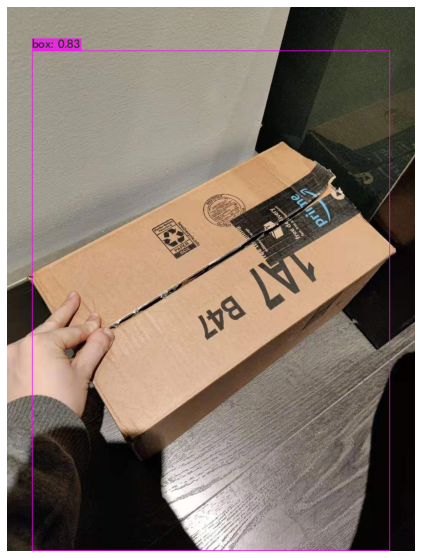

In [49]:
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 2

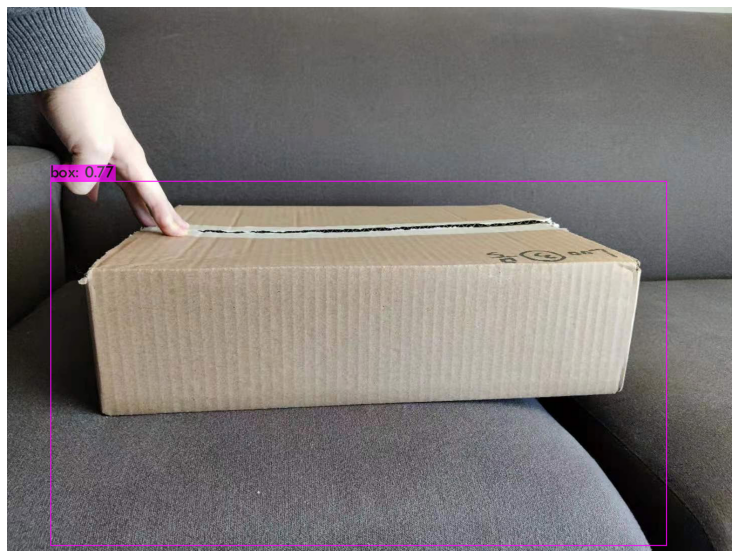

In [50]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg ./backup/yolov2_custom_final.weights /mydrive/yolov2_transfer_learning/box_2.jpg -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 2

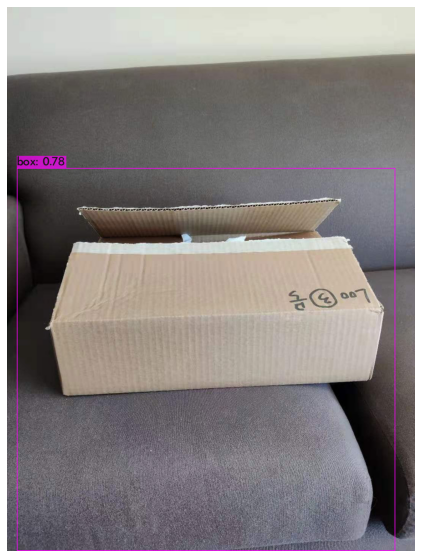

In [51]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg ./backup/yolov2_custom_final.weights /mydrive/yolov2_transfer_learning/box_3.jpg -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 2

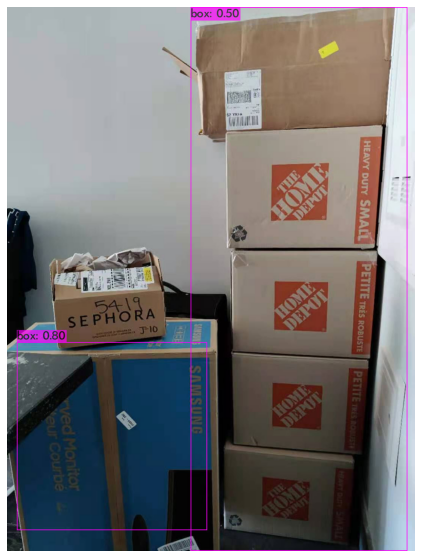

In [52]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg ./backup/yolov2_custom_final.weights /mydrive/yolov2_transfer_learning/box_4.jpg -thresh 0.5
imShow('predictions.jpg')

In [ ]:
#the size of the model weights are about the same size as the yolov3 weights?
#(the size of weights doesn't depend on the input size right?)